<a href="https://colab.research.google.com/github/ruthwick-2484/2303a52484_GenAI/blob/main/2303A52484_GenAI_A7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [ ]:
y.value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
y.count()

768

In [ ]:
x.count()

,0
Pregnancies,768
Glucose,768
BloodPressure,768
SkinThickness,768
Insulin,768
BMI,768
DiabetesPedigreeFunction,768
Age,768


In [ ]:
x_train,x_test1,y_train,y_test1=train_test_split(x,y,test_size=0.2,random_state=42)
x_val,x_test,y_val,y_test=train_test_split(x_test1,y_test1,test_size=0.5,random_state=42)

In [ ]:
scaler = StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)
x_val_scaled=scaler.fit_transform(x_val)

In [ ]:
def diabetes_prediction_model(shape):
  model=Sequential()
  model.add(Dense(12,activation='swish',input_shape=(shape,)))
  model.add(Dense(25,activation='swish'))
  model.add(Dense(15,activation='swish'))
  model.add(Dense(1,activation='sigmoid'))
  return model


In [ ]:
x_train.shape[1]

8

In [ ]:
diabetes_prediction_model =diabetes_prediction_model(x_train.shape[1])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
diabetes_prediction_model.compile(optimizer=Adagrad(),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=diabetes_prediction_model.fit(x_train_scaled,y_train,validation_data=(x_val_scaled,y_val),epochs=300,batch_size=16)

Epoch 1/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4134 - loss: 0.7127 - val_accuracy: 0.4416 - val_loss: 0.7056
Epoch 2/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4407 - loss: 0.7073 - val_accuracy: 0.4416 - val_loss: 0.7018
Epoch 3/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4517 - loss: 0.7079 - val_accuracy: 0.4675 - val_loss: 0.6985
Epoch 4/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4538 - loss: 0.7033 - val_accuracy: 0.4935 - val_loss: 0.6955
Epoch 5/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5077 - loss: 0.6965 - val_accuracy: 0.5195 - val_loss: 0.6927
Epoch 6/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4649 - loss: 0.6982 - val_accuracy: 0.5065 - val_loss: 0.6901
Epoch 7/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5228 - loss: 0.6929 - val_accuracy: 0.5065 - val_loss: 0.6876
Epoch 8/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5089 - loss: 0.6912 - val_accuracy: 0.5065 - 

In [ ]:
y_pred = (diabetes_prediction_model.predict(x_test_scaled) > 0.5).astype(int)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision_score}")
print(f"Recall: {recall_score}")
print(f"F1 Score: {f1_score}")

Accuracy: 0.7272727272727273
Precision: <function precision_score at 0x7e302c338a40>
Recall: <function recall_score at 0x7e302c338b80>
F1 Score: <function f1_score at 0x7e302c338220>


In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.72      0.89      0.80        47
           1       0.74      0.47      0.57        30

    accuracy                           0.73        77
   macro avg       0.73      0.68      0.69        77
weighted avg       0.73      0.73      0.71        77



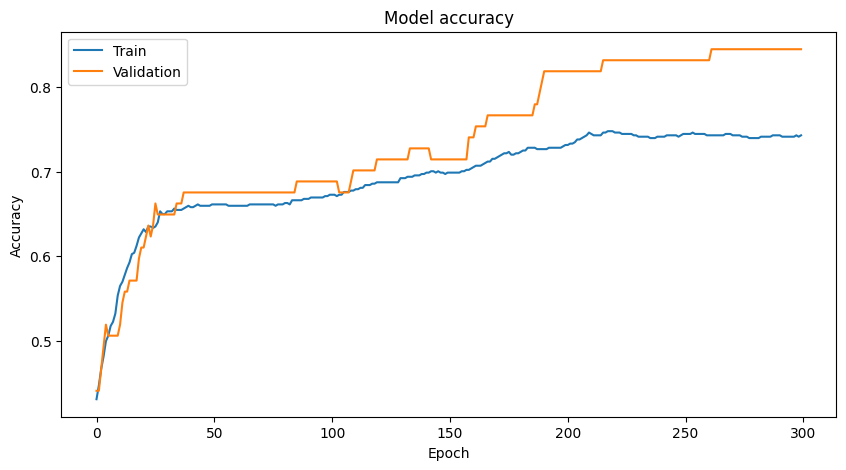

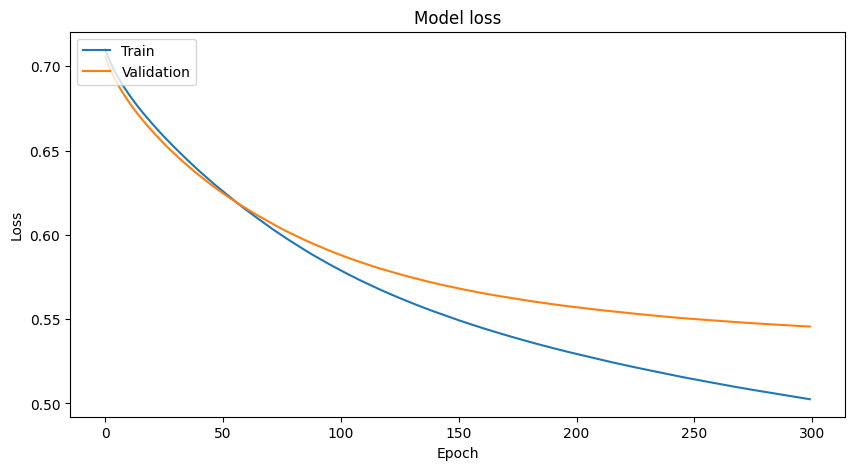

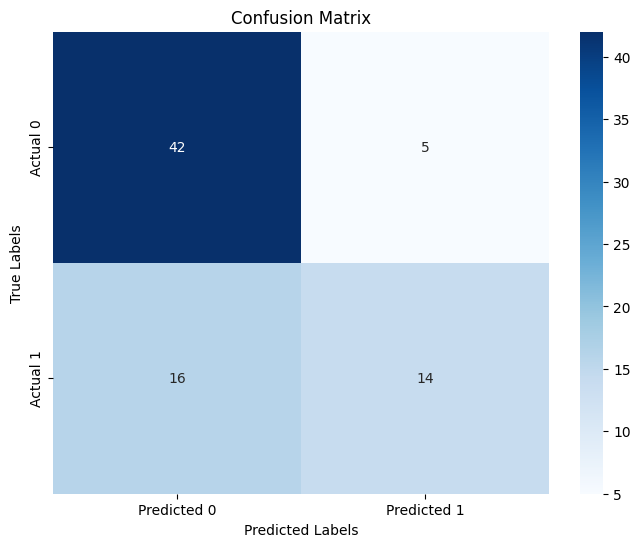

In [ ]:
# prompt: genarte graphs fro above metrices

import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


print()
print()
print()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

print()
print()
print()

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

